In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
adata = sc.read_10x_h5(
    filename="ZB4171/Xenium_V1_FFPE_wildtype_5_7_months_outs/cell_feature_matrix.h5"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 58685 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
df = pd.read_csv(
    "ZB4171/Xenium_V1_FFPE_wildtype_5_7_months_outs/cells.csv.gz", compression="gzip"
)

In [5]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaaaomnd-1   836.610736   834.409473                124   
1      aaabamjh-1   833.482950   854.259235                 79   
2      aaabncdp-1  1659.530890  4259.287744                323   
3      aaacifle-1  1652.178992  4246.164209                184   
4      aaadpmhm-1  1651.423102  4337.113794                214   
...           ...          ...          ...                ...   
58680  oikgljno-1  5192.639209  4613.444312                216   
58681  oikiggdk-1  5205.252661  4616.900757                 67   
58682  oikimpfp-1  5177.544653  4623.797876                 83   
58683  oikjhblj-1  5152.844434  4627.652759                276   
58684  oikkinnp-1  5244.541919  4577.760083                115   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
58680                     0                        0   
58681                     0                        0   
58682                     0                        0   
58683                     0                        0   
58684                     0                        0   

       unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
0                               0           124  588.385938     18.468906  
1                               0            79  670.434844     15.217656  
2                               0           323  326.073281     61.322188  
3                               0           184  190.965781     49.355781  
4                               0           214  214.537344     58.522500  
...                           ...           ...         ...           ...  
58680                           0           216  267.686250     21.042813  
58681                           0            67  286.561563     13.501719  
58682                           0            83  356.553750     11.650313  
58683                           0           276  517.400313     14.540313  
58684                           0           115  247.727188     21.675000  

[58685 rows x 10 columns]

In [6]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [7]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [8]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaaaomnd-1  aaaaomnd-1   836.610736   834.409473                124   
aaabamjh-1  aaabamjh-1   833.482950   854.259235                 79   
aaabncdp-1  aaabncdp-1  1659.530890  4259.287744                323   
aaacifle-1  aaacifle-1  1652.178992  4246.164209                184   
aaadpmhm-1  aaadpmhm-1  1651.423102  4337.113794                214   
...                ...          ...          ...                ...   
oikgljno-1  oikgljno-1  5192.639209  4613.444312                216   
oikiggdk-1  oikiggdk-1  5205.252661  4616.900757                 67   
oikimpfp-1  oikimpfp-1  5177.544653  4623.797876                 83   
oikjhblj-1  oikjhblj-1  5152.844434  4627.652759                276   
oikkinnp-1  oikkinnp-1  5244.541919  4577.760083                115   

            control_probe_counts  control_codeword_counts  \
aaaaomnd-1                     0                        0   
aaabamjh-1                     0                        0   
aaabncdp-1                     0                        0   
aaacifle-1                     0                        0   
aaadpmhm-1                     0                        0   
...                          ...                      ...   
oikgljno-1                     0                        0   
oikiggdk-1                     0                        0   
oikimpfp-1                     0                        0   
oikjhblj-1                     0                        0   
oikkinnp-1                     0                        0   

            unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
aaaaomnd-1                           0           124  588.385938     18.468906  
aaabamjh-1                           0            79  670.434844     15.217656  
aaabncdp-1                           0           323  326.073281     61.322188  
aaacifle-1                           0           184  190.965781     49.355781  
aaadpmhm-1                           0           214  214.537344     58.522500  
...                                ...           ...         ...           ...  
oikgljno-1                           0           216  267.686250     21.042813  
oikiggdk-1                           0            67  286.561563     13.501719  
oikimpfp-1                           0            83  356.553750     11.650313  
oikjhblj-1                           0           276  517.400313     14.540313  
oikkinnp-1                           0           115  247.727188     21.675000  

[58685 rows x 10 columns]

In [9]:
adata.to_df()

2010300C02Rik  Abca7  Acsbg1  Acta2  Acvrl1  Adamts2  Adamtsl1  \
aaaaomnd-1            0.0    0.0     0.0    1.0     0.0      1.0       0.0   
aaabamjh-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaabncdp-1            1.0    0.0     2.0    0.0     0.0      0.0       0.0   
aaacifle-1            1.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaadpmhm-1            3.0    0.0     1.0    0.0     0.0      0.0       0.0   
...                   ...    ...     ...    ...     ...      ...       ...   
oikgljno-1            0.0    0.0     0.0    1.0     0.0      0.0       0.0   
oikiggdk-1            0.0    0.0     0.0    0.0     0.0      1.0       0.0   
oikimpfp-1            0.0    0.0     1.0    0.0     0.0      0.0       0.0   
oikjhblj-1            1.0    0.0     0.0    0.0     0.0      0.0       0.0   
oikkinnp-1            1.0    0.0     0.0    0.0     0.0      0.0       0.0   

            Adgrl4  Aldh1a2  Aldh1l1  ...  Unc13c  Vat1l  Vcan  Vim   Vip  \
aaaaomnd-1     0.0      6.0      0.0  ...     0.0    0.0   0.0  0.0   0.0   
aaabamjh-1     0.0      2.0      0.0  ...     0.0    0.0   0.0  0.0   0.0   
aaabncdp-1     0.0      0.0      1.0  ...     0.0    1.0   0.0  0.0   0.0   
aaacifle-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  15.0   
aaadpmhm-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0   0.0   
...            ...      ...      ...  ...     ...    ...   ...  ...   ...   
oikgljno-1     0.0      2.0      1.0  ...     0.0    0.0   0.0  2.0   0.0   
oikiggdk-1     0.0      0.0      0.0  ...     0.0    1.0   0.0  0.0   0.0   
oikimpfp-1     0.0      3.0      0.0  ...     0.0    0.0   0.0  0.0   0.0   
oikjhblj-1     0.0      4.0      2.0  ...     0.0    1.0   0.0  2.0   0.0   
oikkinnp-1     2.0      0.0      0.0  ...     0.0    0.0   0.0  4.0   0.0   

            Vwc2l  Wfs1  Zfp366  Zfp536  Zfpm2  
aaaaomnd-1    0.0   0.0     0.0     0.0    0.0  
aaabamjh-1    0.0   0.0     0.0     0.0    0.0  
aaabncdp-1    0.0   0.0     0.0     0.0    0.0  
aaacifle-1    0.0   0.0     0.0     2.0    0.0  
aaadpmhm-1    0.0   3.0     0.0     0.0    0.0  
...           ...   ...     ...     ...    ...  
oikgljno-1    0.0   0.0     0.0     0.0    0.0  
oikiggdk-1    0.0   0.0     0.0     0.0    0.0  
oikimpfp-1    0.0   0.0     0.0     0.0    0.0  
oikjhblj-1    0.0   0.0     0.0     0.0    0.0  
oikkinnp-1    0.0   0.0     1.0     1.0    0.0  

[58685 rows x 347 columns]

**Quality Control**

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [11]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.008131052482457045
Negative decoding count % : 0.004156181200295368


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

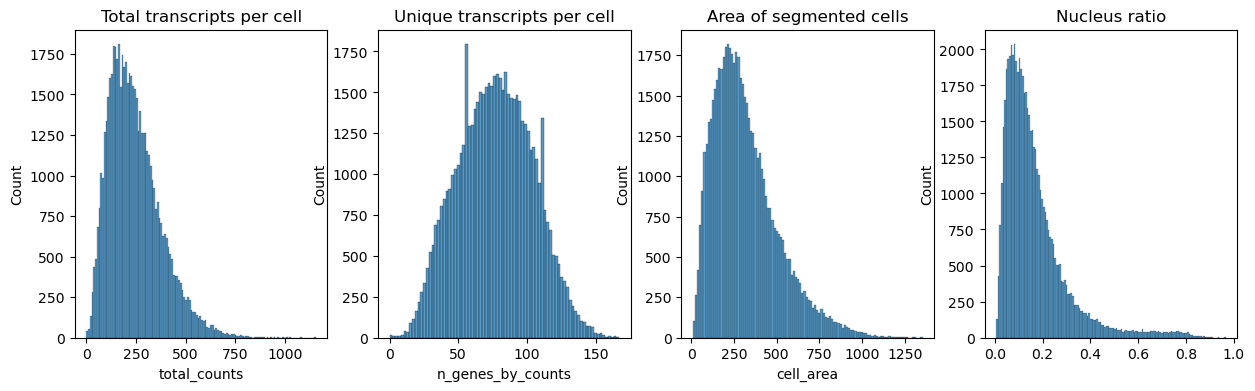

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [13]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


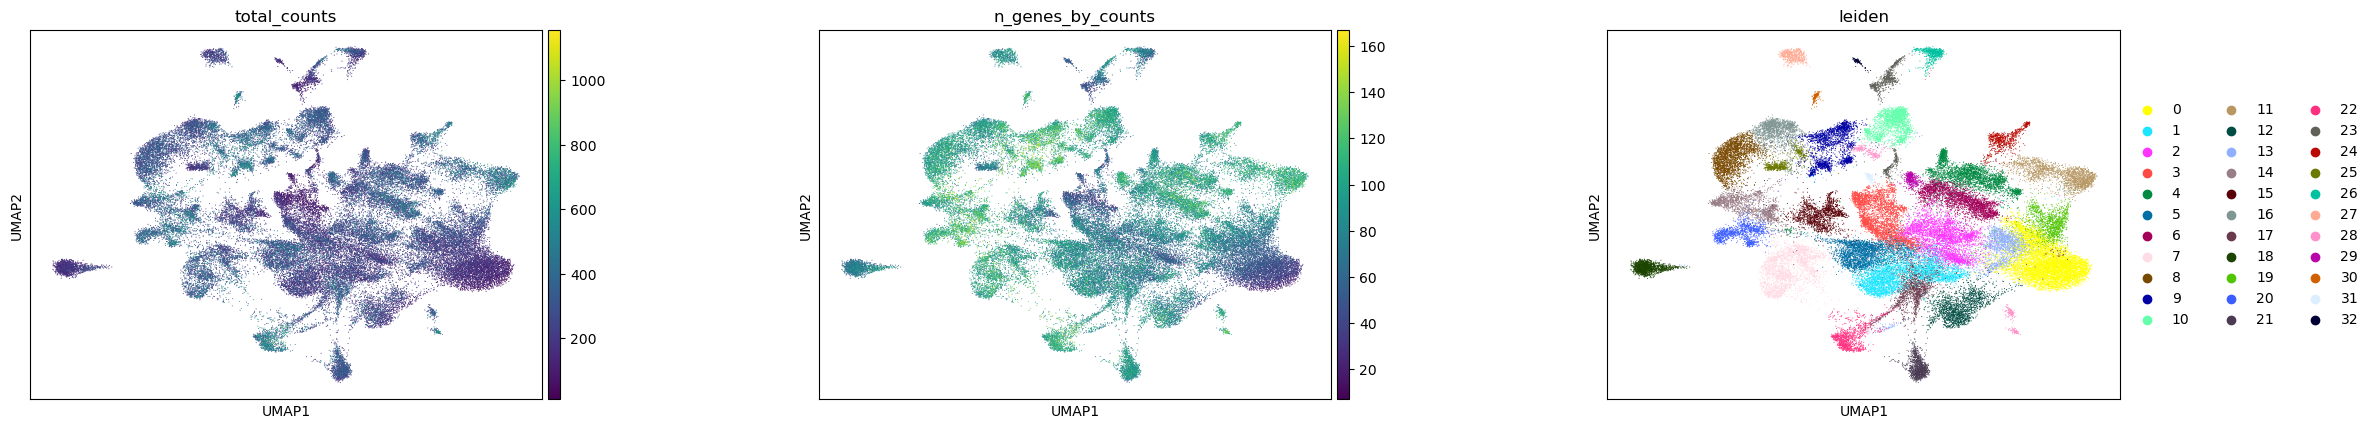

In [15]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

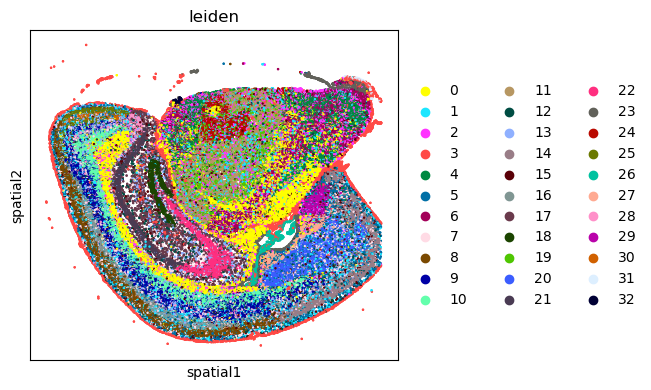

In [16]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


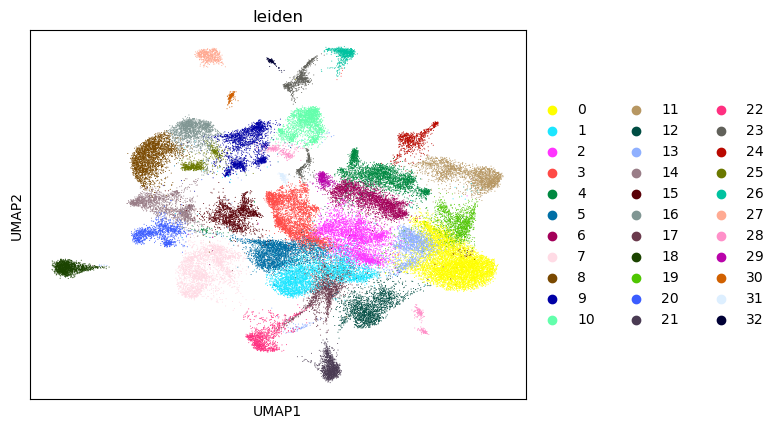

In [18]:
sc.pl.umap(
    adata,
    color=[
        "leiden"
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


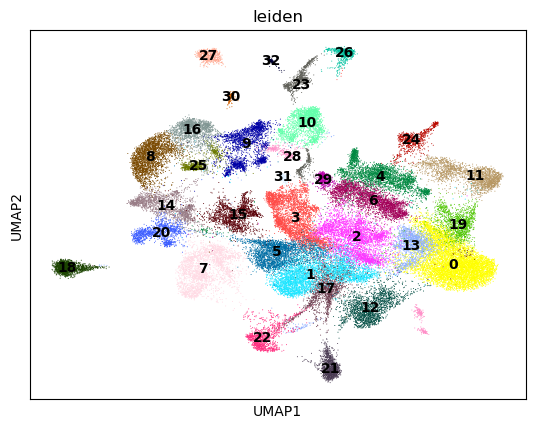

In [19]:
sc.pl.umap(
    adata,
    color=[
        "leiden"],
    legend_loc='on data',
    wspace=0.4,
)

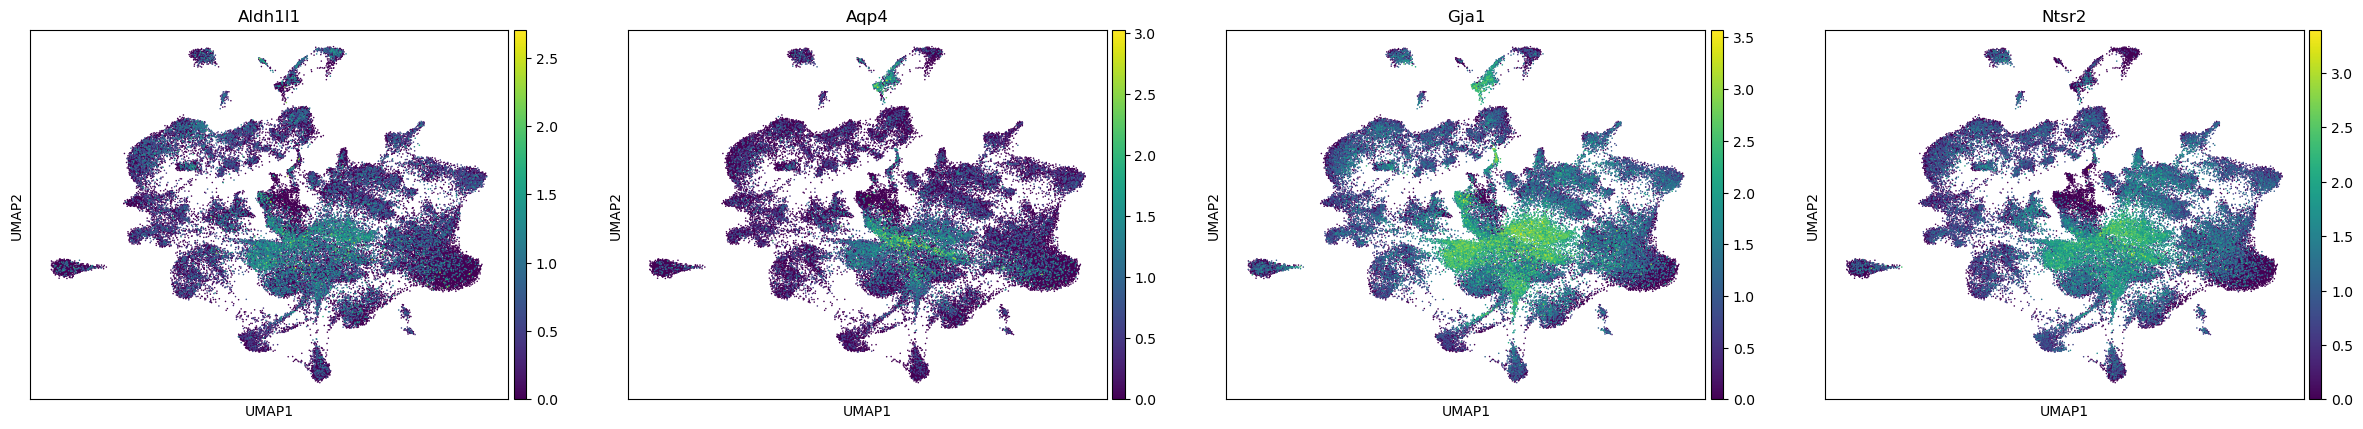

In [20]:
#Astrocytes
sc.pl.umap(adata,
           color=["Aldh1l1", "Aqp4", "Gja1", "Ntsr2"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

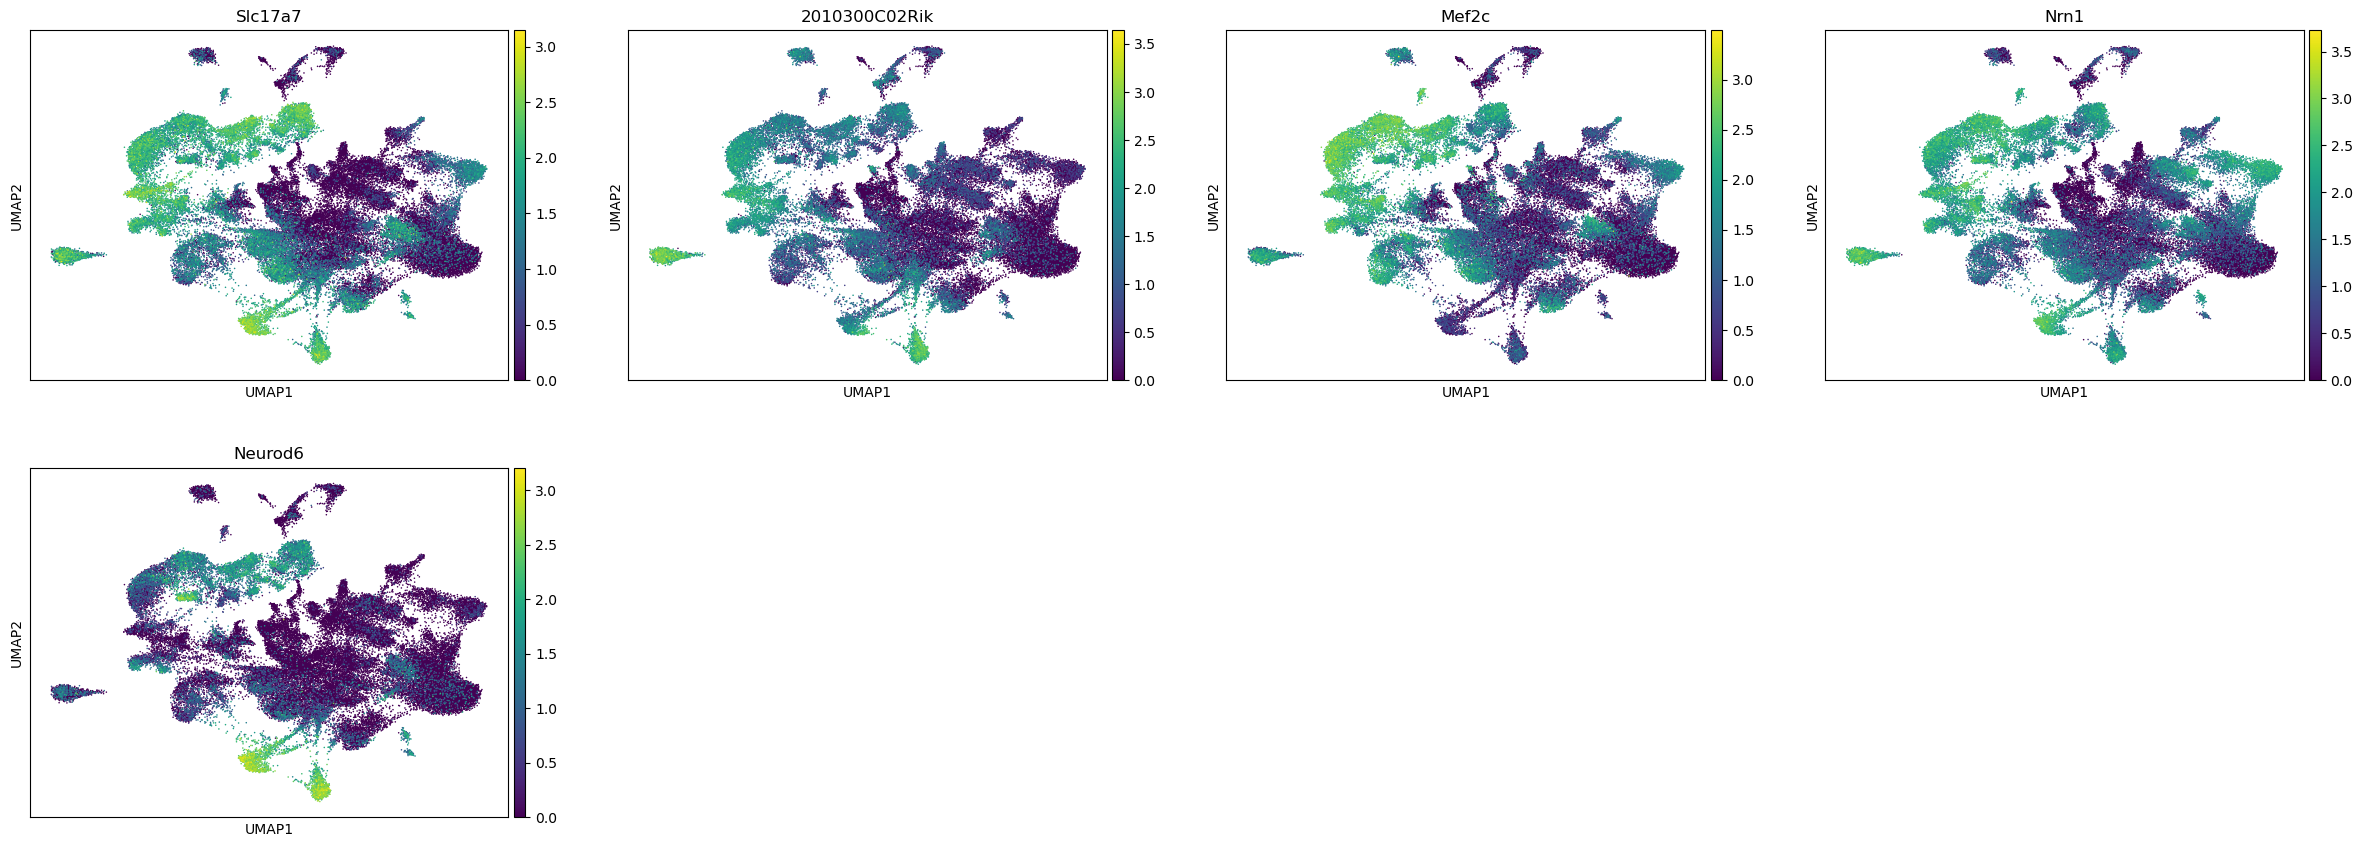

In [21]:
#Excitory Neurons
sc.pl.umap(adata,
           color=["Slc17a7", "2010300C02Rik", "Mef2c", "Nrn1", "Neurod6"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

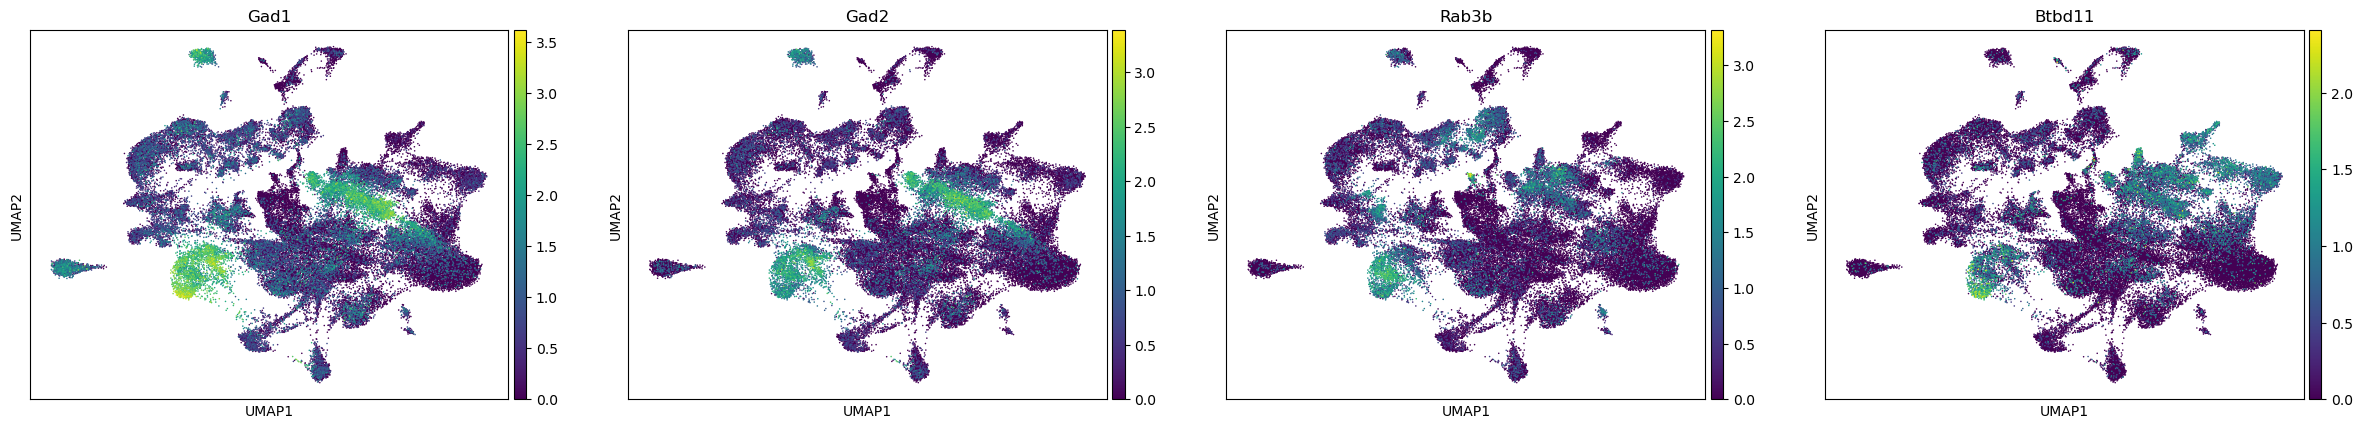

In [22]:
#Inhibitory Neurons
sc.pl.umap(adata,
           color=["Gad1", "Gad2", "Rab3b", "Btbd11"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

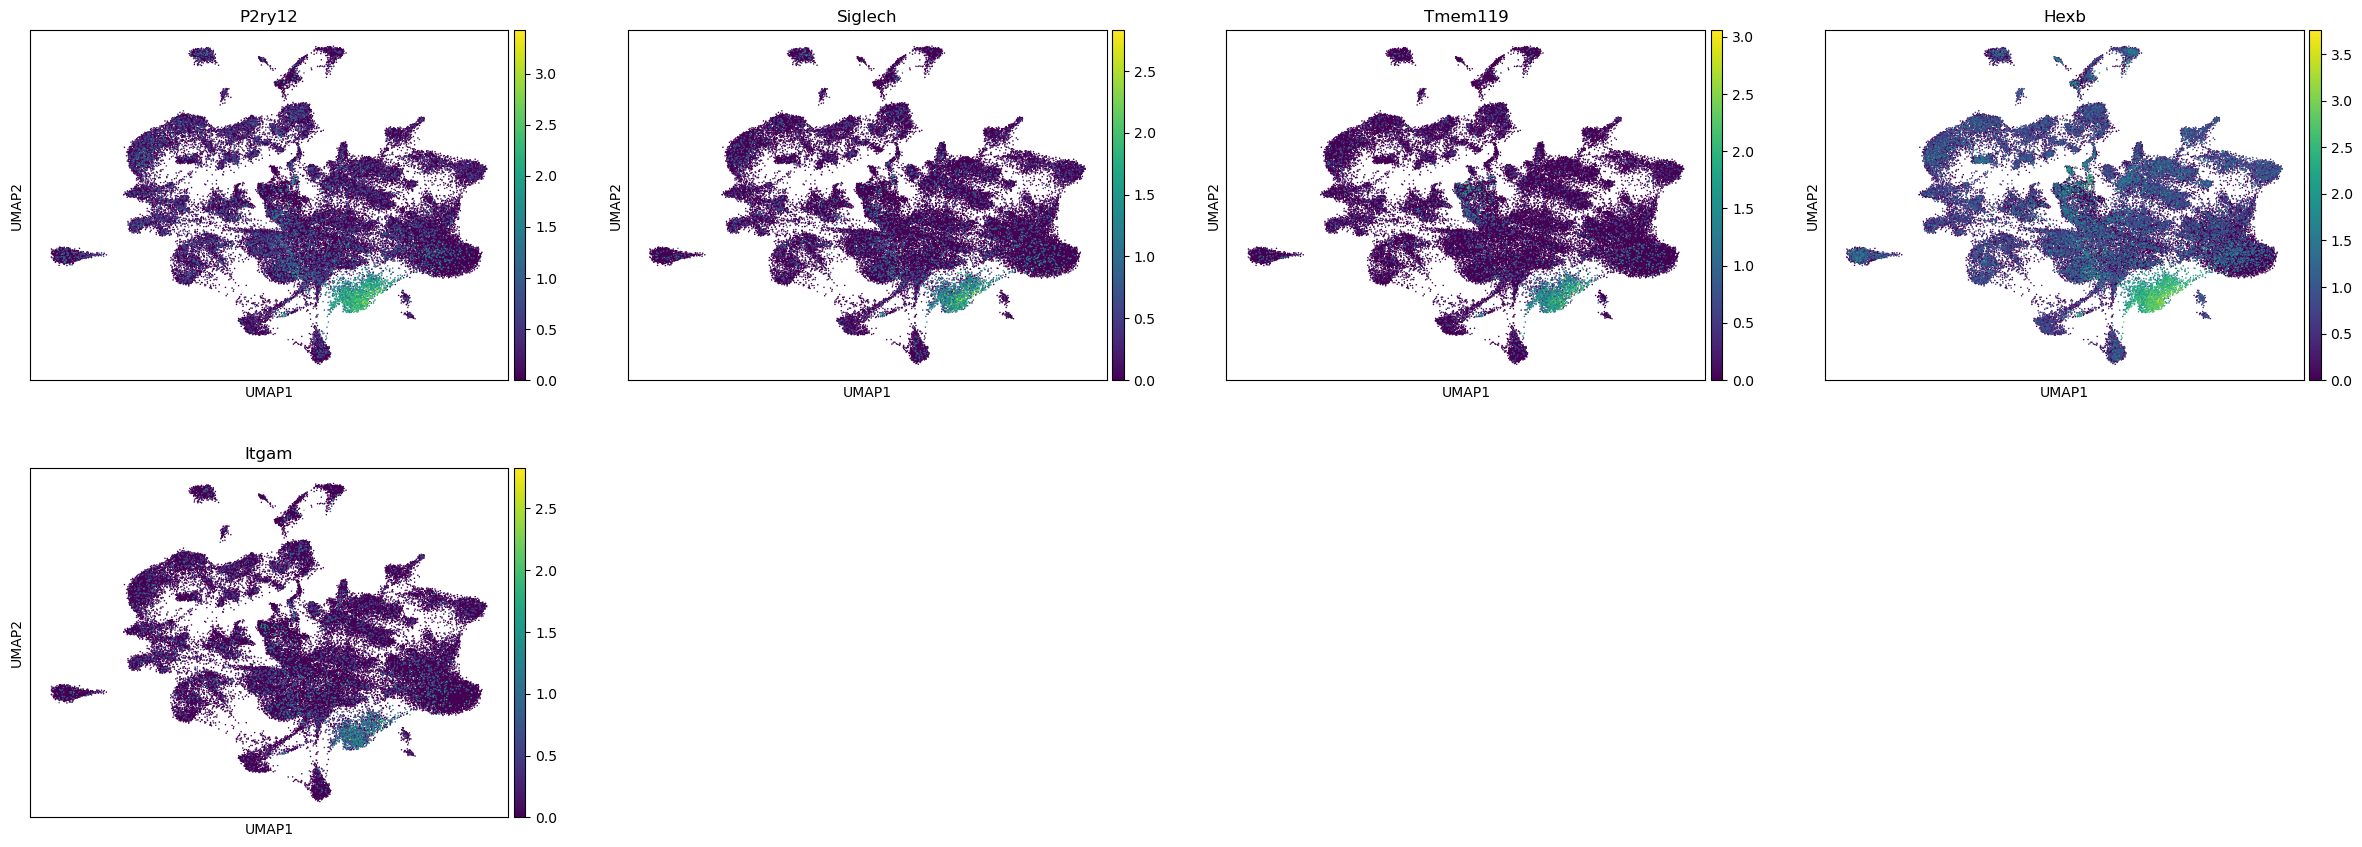

In [23]:
#Microglia
sc.pl.umap(adata,
           color=["P2ry12", "Siglech", "Tmem119", "Hexb", "Itgam"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

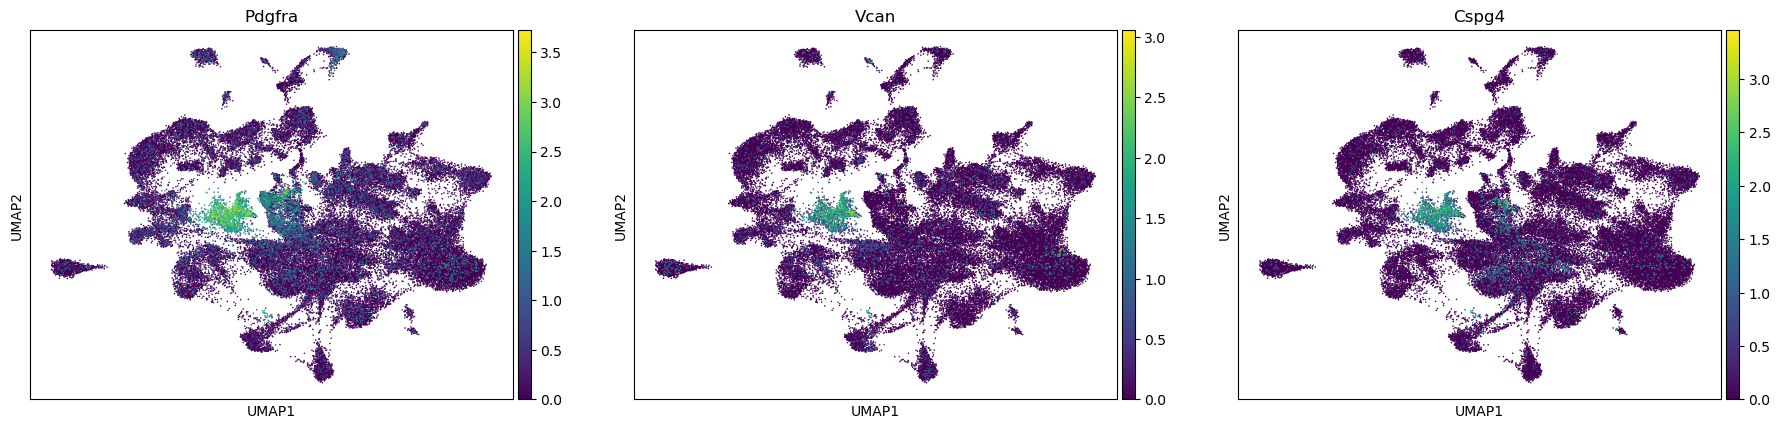

In [24]:
#OPC
sc.pl.umap(adata,
           color=["Pdgfra", "Vcan", "Cspg4"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

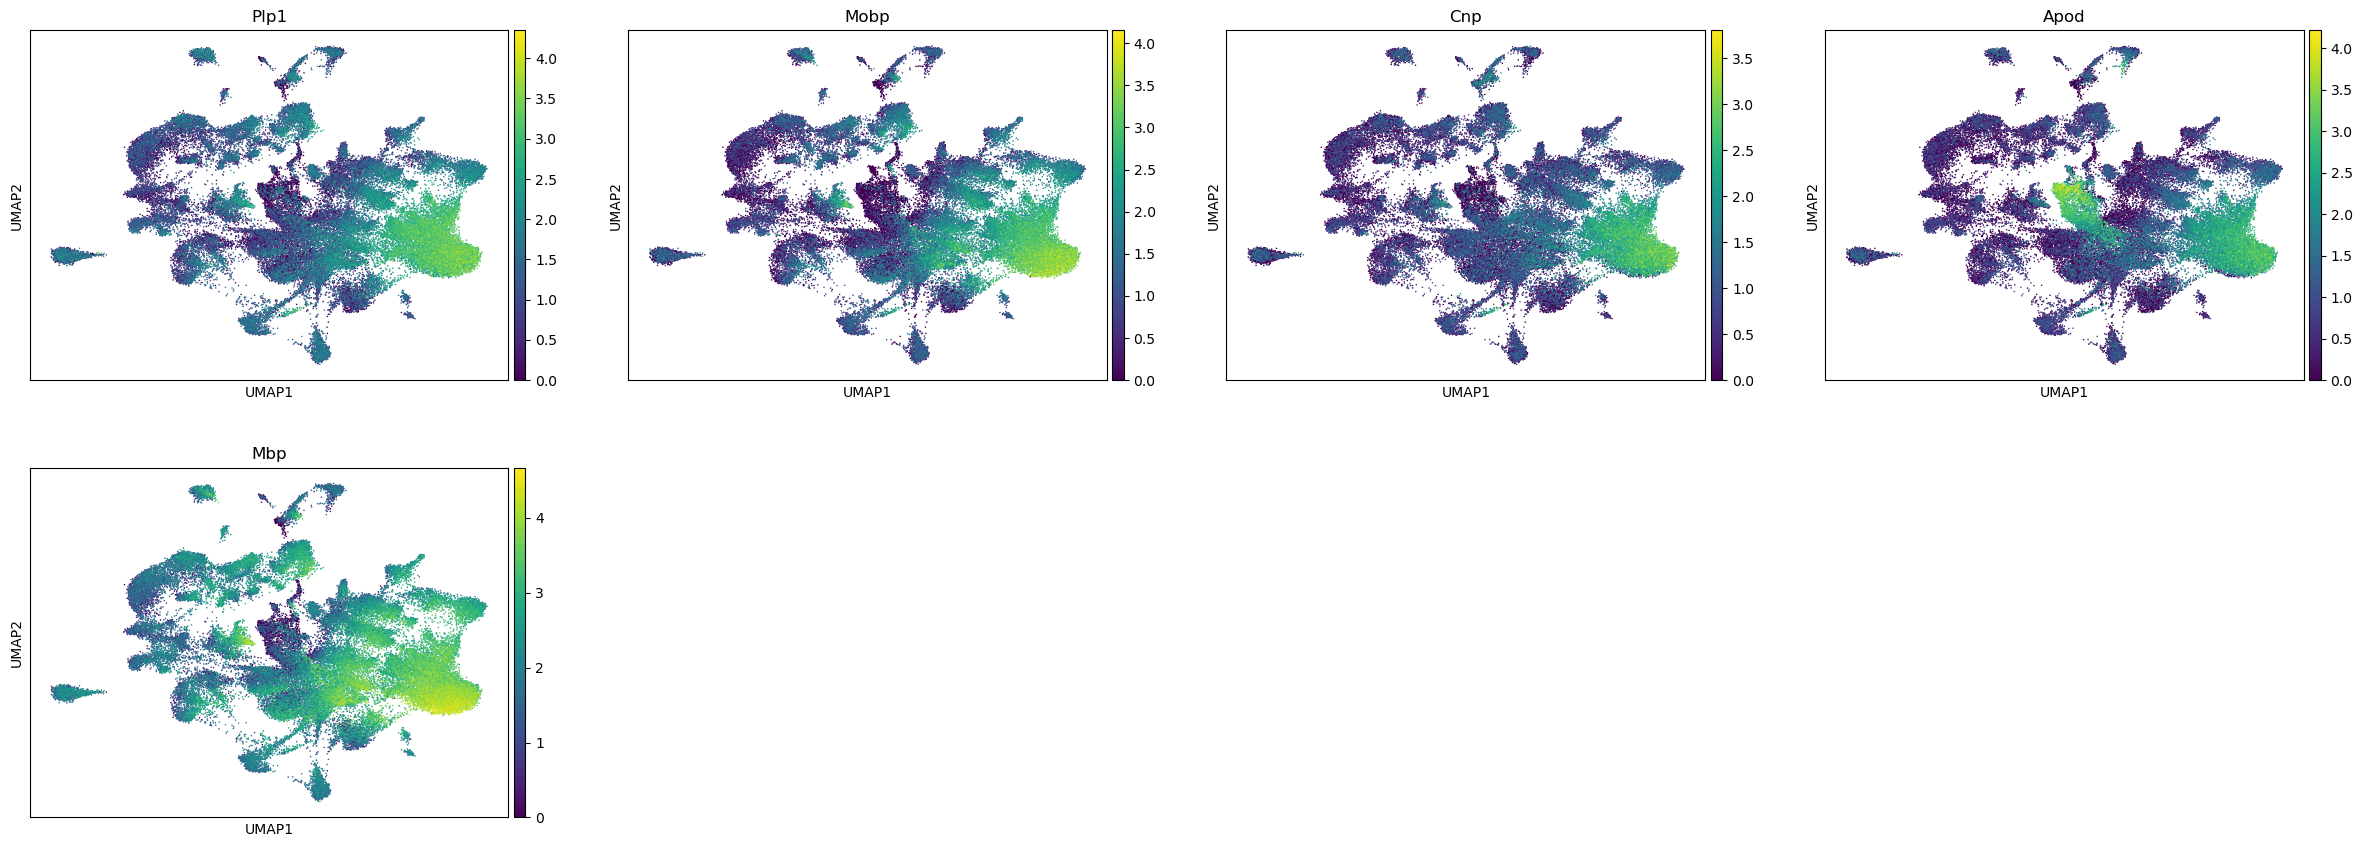

In [25]:
#Oligodendrocytes
sc.pl.umap(adata,
           color=["Plp1", "Mobp", "Cnp", "Apod", "Mbp"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

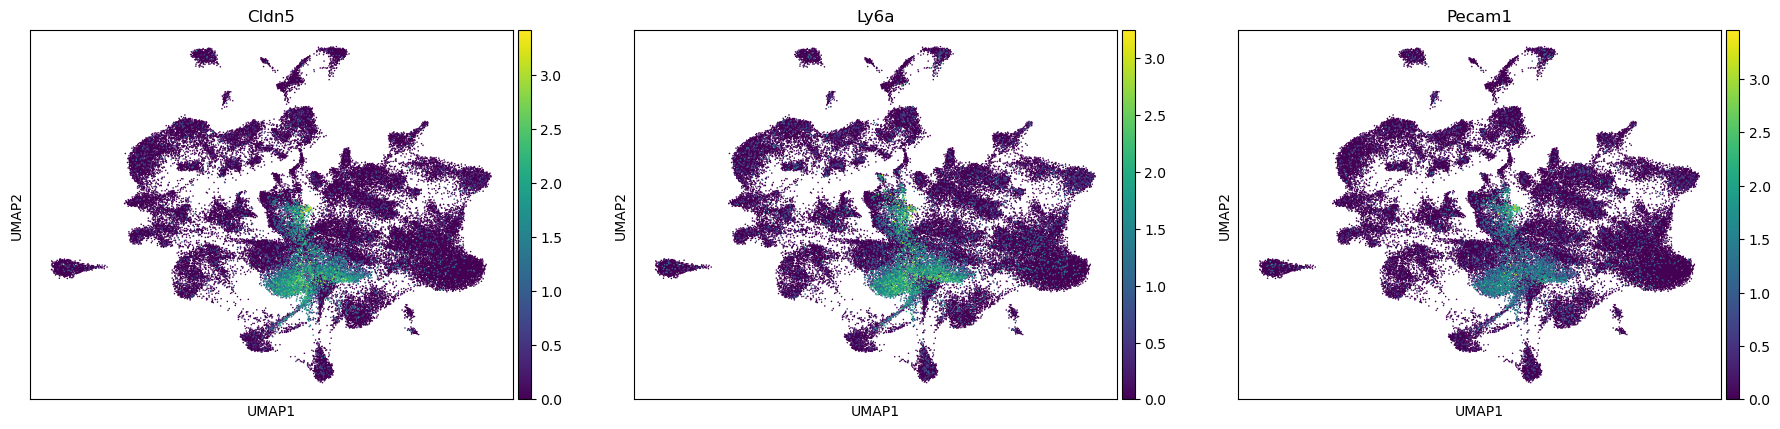

In [26]:
#Pericytes/Endothelial
sc.pl.umap(adata,
           color=["Cldn5", "Ly6a", "Pecam1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

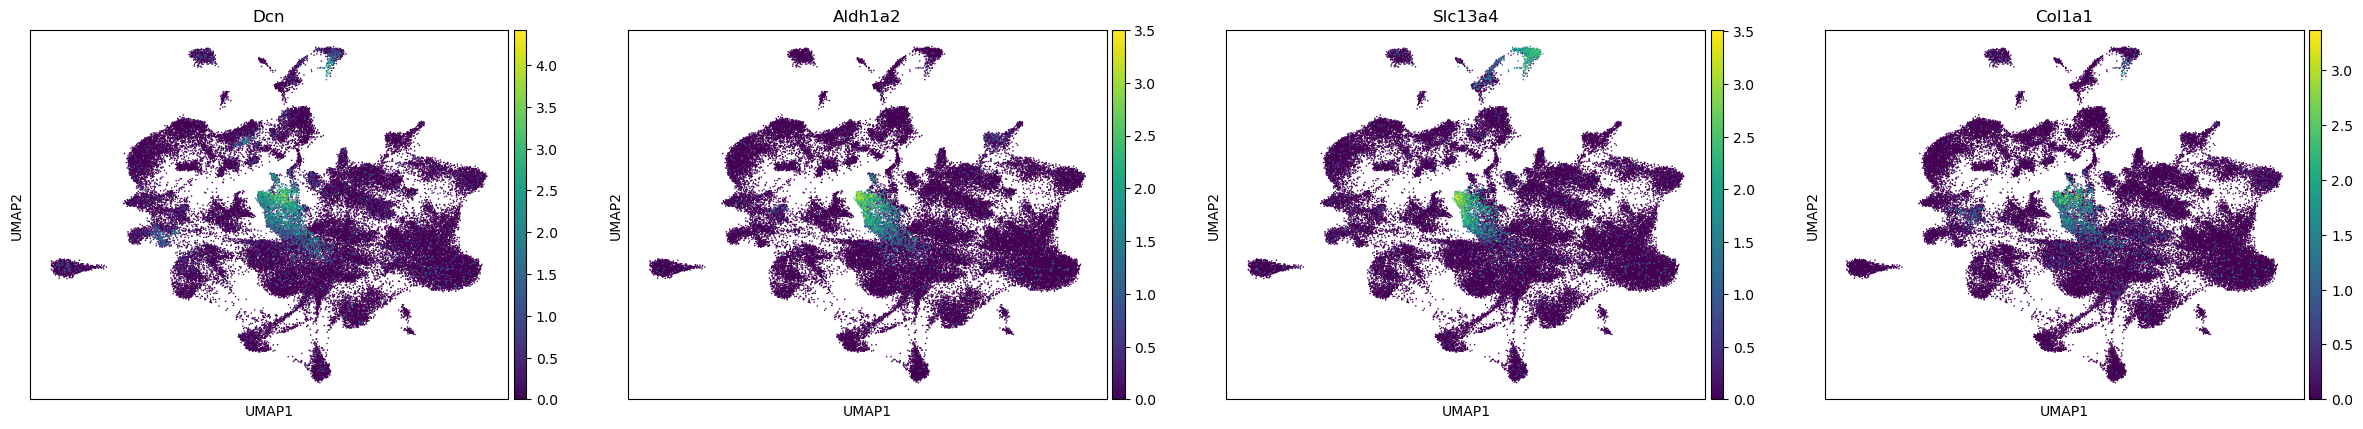

In [27]:
#Fibroblast
sc.pl.umap(adata,
           color=["Dcn", "Aldh1a2", "Slc13a4", "Col1a1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

In [28]:
labels= {"0":"Oligodendrocytes",
'1':"Pericytes/Endothelial",
'2':"Astrocytes",
'3':"Fibroblast",
'4':"-",
'5':"Astrocytes",
'6':"Inhibitory Neurons",
'7':"Inhibitory Neurons",
'8':"Excitory Neurons",
'9':"Excitory Neurons",
'10':"Excitory Neurons",
'11':"Excitory Neurons",
'12':"Microglia",
'13':"Oligodendrocytes",
'14':"Excitory Neurons",
'15':"OPC",
'16':"Excitory Neurons",
'17':"Astrocytes",
'18':"Excitory Neurons",
'19':"Oligodendrocytes",
'20':"Excitory Neurons",
'21':"Excitory Neurons",
'22':"Excitory Neurons",
'23':"-",
'24':"-",
'25':"Excitory Neurons",
'26':"-",
'27':"Inhibitory Neurons",
'28':"Excitory Neurons",
'29':"Inhibitory Neurons",
'30':"Excitory Neurons",
'31':"Fibroblast",
        '32':"-"}

In [29]:
# Assign cell type labels to single cells in adata
adata.obs["cell_type"] = adata.obs["leiden"].map(labels)

In [30]:
adata.obs["cell_type"]

aaaaomnd-1            Fibroblast
aaabamjh-1            Fibroblast
aaabncdp-1      Excitory Neurons
aaacifle-1    Inhibitory Neurons
aaadpmhm-1      Excitory Neurons
                     ...        
oikgljno-1            Fibroblast
oikiggdk-1            Fibroblast
oikimpfp-1            Fibroblast
oikjhblj-1            Fibroblast
oikkinnp-1            Fibroblast
Name: cell_type, Length: 58642, dtype: object

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


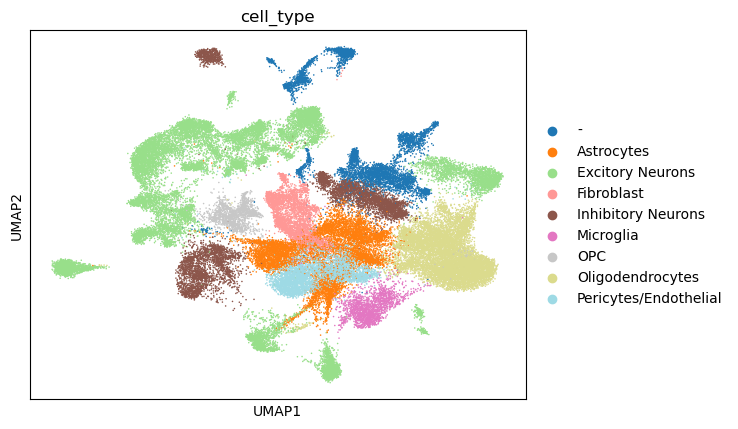

In [31]:
sc.pl.umap(adata,
           color=['cell_type'],
           size=5,
           palette= "tab20")

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

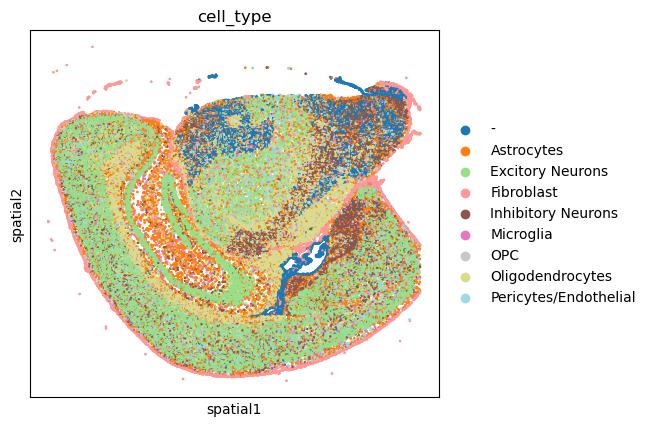

In [32]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["cell_type"],
    wspace=0.4,
)

In [33]:
adata

AnnData object with n_obs × n_vars = 58642 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [34]:
adata.write("Xenium_WT_57.h5ad")

In [35]:
adata= sc.read_h5ad("Xenium_WT_57.h5ad")

In [36]:
adata

AnnData object with n_obs × n_vars = 58642 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'